In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv("train.csv")
tdata = pd.read_csv("test.csv")

In [2]:
data.describe(include ='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Petterson, Mr. Johan Emil",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Text(0.5, 1.0, 'Distribuição de Sobreviventes')

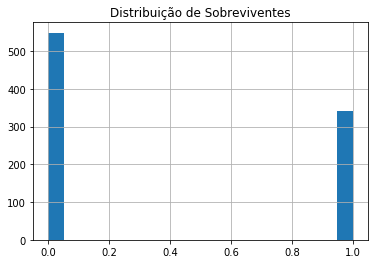

In [3]:
##Distribuição de sobreviventes
# Mais pessoas morreram do que sobreviveram(desbalanceado)
data.Survived.hist(bins=20)
plt.title("Distribuição de Sobreviventes")

Text(0.5, 1.0, 'Distribuição de Sexo')

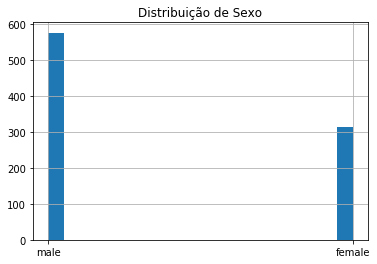

In [4]:
##Distribuição de sexo
# Mais homens que mulheres
# Como a maioria morreu e a maioria dos dados de treino são homens,
# pode haver uma relação entre ser homem e morrer.
data.Sex.hist(bins=20)
plt.title("Distribuição de Sexo")

Text(0.5, 1.0, 'Distribuição de Classe')

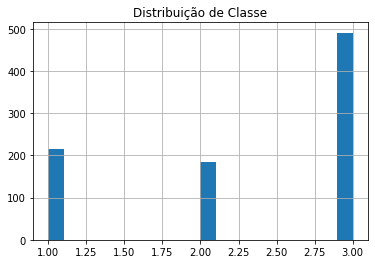

In [5]:
## Distribuição de Classe
# Maioria é de terceira classe(Pode haver uma relação)
data.Pclass.hist(bins=20)
plt.title("Distribuição de Classe")

Text(0.5, 1.0, 'Distribuição de Idade')

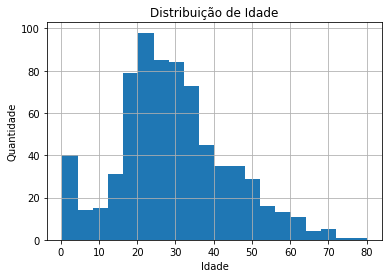

In [6]:
## Distribuição de Idade
# Maioria de meia idade
data.Age.hist(bins=20)
plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.title("Distribuição de Idade")

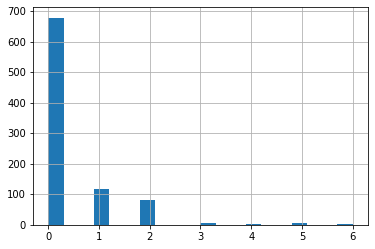

In [7]:
## Distribuição de Parentes
# Maioria tem 0 parentes
data.Parch.hist(bins=20)

In [8]:
## Explorando os dados
#  Prova que sobrevivem menos homens que mulheres
data[["Survived", "Sex"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
## Explorando os dados
#  Prova que mesmo as pessoas sendo de maioria da terceira classe,
#  elas foram a que menos sobreviveram
data[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
## Exploração de dados
#  Numero de parentes embarcados
#  Intuitivamente parece relevante
#  Pessoas com 0 parentes tendem a morrer
data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [11]:
data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


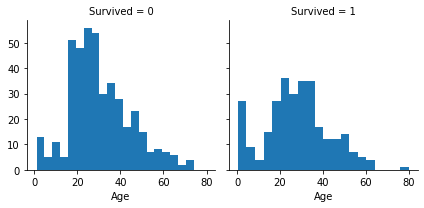

In [12]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

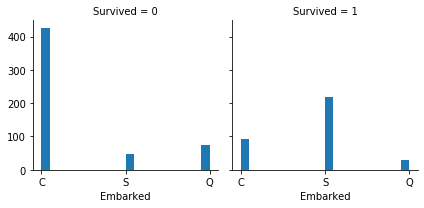

In [13]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Embarked', bins=20)

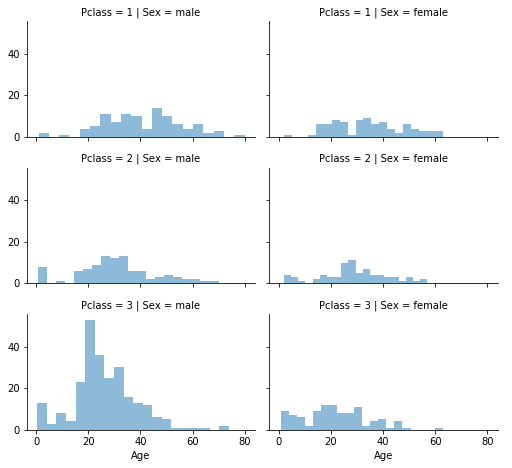

In [14]:
g = sns.FacetGrid(data, row='Pclass', col='Sex', height=2.2, aspect=1.6)
g.map(plt.hist, 'Age', alpha=.5, bins=20)
g.add_legend()

In [15]:
## Detectando valores missing
# Cabin pode ser descartado(Não interfere no modelo)
# Idade deve ser tratada
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
## Removendo valores insignificantes para o modelo
print(data.shape)
data = data.drop(['Ticket', 'Cabin'], axis=1)
tdata = tdata.drop(['Ticket', 'Cabin'], axis=1)
print(data.shape)


(891, 12)
(891, 10)


In [17]:
## Removendo valores insignificantes para o modelo
print(data.shape)
data = data.drop(['PassengerId','Name'], axis=1)
tdata = tdata.drop(['Name'], axis=1)
print(data.shape)

(891, 10)
(891, 8)


In [18]:
## Tratando valores missing
data.Age.ffill(inplace=True)#
data.Embarked.ffill(inplace=True)# Foward Fill

tdata.Age.ffill(inplace=True)#
tdata.Embarked.ffill(inplace=True)# Foward Fill
tdata.Fare.bfill(inplace=True)#Back Fill

In [19]:
tdata.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

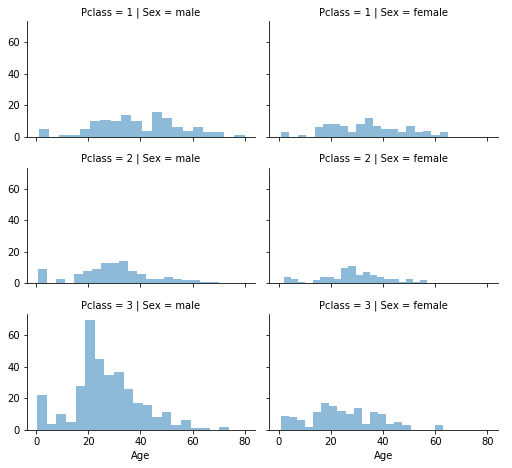

In [20]:
g = sns.FacetGrid(data, row='Pclass', col='Sex', height=2.2, aspect=1.6)
g.map(plt.hist, 'Age', alpha=.5, bins=20)
g.add_legend()

In [21]:
## Convertendo valores
data['Sex'] = data['Sex'].map({'female' : 1, 'male' : 0})
tdata['Sex'] = tdata['Sex'].map({'female' : 1, 'male' : 0})

In [22]:
## Convertendo valores AGE BAND
data['AgeBand'] = pd.cut(data['Age'], 5)
data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)
tdata['AgeBand'] = pd.cut(tdata['Age'], 5)


In [23]:
data.loc[ data['Age'] <= 16, 'Age'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
data.loc[ data['Age'] > 64, 'Age'] = 4

tdata.loc[ tdata['Age'] <= 16, 'Age'] = 0
tdata.loc[(tdata['Age'] > 16) & (tdata['Age'] <= 32), 'Age'] = 1
tdata.loc[(tdata['Age'] > 32) & (tdata['Age'] <= 48), 'Age'] = 2
tdata.loc[(tdata['Age'] > 48) & (tdata['Age'] <= 64), 'Age'] = 3
tdata.loc[ tdata['Age'] > 64, 'Age'] = 4


In [24]:
data = data.drop(['AgeBand'], axis=1)
tdata = tdata.drop(['AgeBand'], axis=1)

In [25]:
## Convertendo valores FareBand
data['FareBand'] = pd.qcut(data['Fare'], 4)
data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

tdata['FareBand'] = pd.qcut(tdata['Fare'], 4)


In [26]:
data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31.0), 'Fare'] = 2
data.loc[data['Fare'] > 31.0, 'Fare'] = 3

tdata.loc[ tdata['Fare'] <= 7.91, 'Fare'] = 0
tdata.loc[(tdata['Fare'] > 7.91) & (tdata['Fare'] <= 14.454), 'Fare'] = 1
tdata.loc[(tdata['Fare'] > 14.454) & (tdata['Fare'] <= 31.0), 'Fare'] = 2
tdata.loc[tdata['Fare'] > 31.0, 'Fare'] = 3


In [27]:
data = data.drop(['FareBand'], axis=1)

tdata = tdata.drop(['FareBand'], axis=1)

In [28]:
## Convertendo valor nominal para numerico
data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )
tdata['Embarked'] = tdata['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )



In [29]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1.0,1,0,0.0,0
1,1,1,1,2.0,1,0,3.0,1
2,1,3,1,1.0,0,0,1.0,0
3,1,1,1,2.0,1,0,3.0,0
4,0,3,0,2.0,0,0,1.0,0
...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,1.0,0
887,1,1,1,1.0,0,0,2.0,0
888,0,3,1,1.0,1,2,2.0,0
889,1,1,0,1.0,0,0,2.0,1


In [30]:
tdata

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,2.0,0,0,0.0,2
1,893,3,1,2.0,1,0,0.0,0
2,894,2,0,3.0,0,0,1.0,2
3,895,3,0,1.0,0,0,1.0,0
4,896,3,1,1.0,1,1,1.0,0
...,...,...,...,...,...,...,...,...
413,1305,3,0,1.0,0,0,1.0,0
414,1306,1,1,2.0,0,0,3.0,1
415,1307,3,0,2.0,0,0,0.0,0
416,1308,3,0,2.0,0,0,1.0,0


In [46]:
##Go to predict
from sklearn.model_selection import train_test_split
X_all = data.drop("Survived", axis=1)
Y_all = data["Survived"]
X_test  = tdata.drop("PassengerId", axis=1).copy()
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size=0.05, random_state=42)

In [47]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)
print (dt.score( X_train, Y_train) , dt.score( X_test , Y_test ))

0.8912529550827423 0.8222222222222222


In [48]:
## Importancia das variavéis   
imp = pd.DataFrame( 
      dt.feature_importances_  , 
      columns = [ 'Importance' ] , 
      index = X_train.columns 
    )
imp

,Importance
Pclass,0.154991
Sex,0.435988
Age,0.103843
SibSp,0.077095
Parch,0.093902
Fare,0.071535
Embarked,0.062646


In [49]:
'''from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
print (model.score( X_train, Y_train) , model.score( X_test , Y_test ))'''

'from sklearn.linear_model import LogisticRegression\nmodel = LogisticRegression()\nmodel.fit(X_train, Y_train)\nprint (model.score( X_train, Y_train) , model.score( X_test , Y_test ))'

In [50]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 13)
model.fit(X_train, Y_train)
print (model.score( X_train, Y_train) , model.score( X_test , Y_test ))

0.817966903073286 0.8222222222222222


In [51]:
'''from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, Y_train)
print (model.score( X_train, Y_train) , model.score( X_test , Y_test ))'''

'from sklearn.ensemble import GradientBoostingClassifier\nmodel = GradientBoostingClassifier()\nmodel.fit(X_train, Y_train)\nprint (model.score( X_train, Y_train) , model.score( X_test , Y_test ))'

In [52]:
ids = tdata["PassengerId"]
predictions = dt.predict(tdata.drop('PassengerId', axis=1))
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('predictions1.csv', index = False)
#0.7511
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
